In [1]:
# pulling the data

import requests
import pandas as pd
r = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")
data = r.text.replace('\n', ' ').split(" ")
data = list(filter(lambda x: x != '', data))
feats = ["CRIM","ZN","INDUS","CHAS","NOX","RM", "AGE","DIS", "RAD", "TAX","PTRATIO", "B", "LSTAT", "MEDV"] 
df = pd.DataFrame(columns=feats)
num = int(len(data)/14)
for i in range(num):
    df.loc[i] = data[i*14:i*14+14]
df.to_csv("housing.csv", index=False)

In [2]:
# read into dataframe

data = pd.read_csv("housing.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
print(data.shape)

(506, 14)


In [10]:
# import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={"figure.figsize": (10, 8)})


In [5]:
# check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
# we see that there is no missing data

In [7]:
# analyse the target column
data['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

/Users/JazlynChuah/miniconda3/envs/CE9010_PROJECT/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


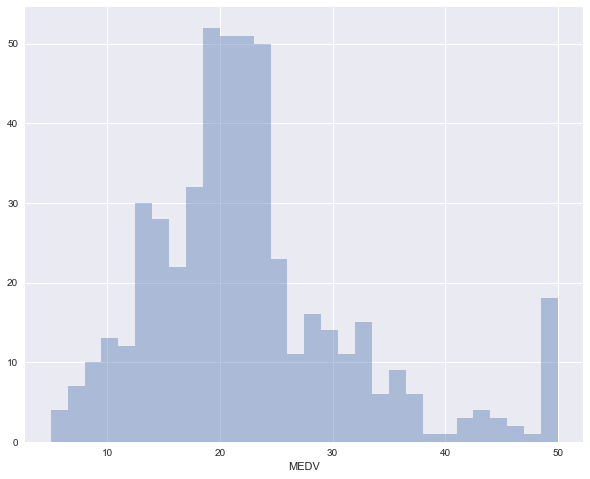

In [11]:
# to get a better understanding of the distribution of the MEDV variable
sns.distplot(data['MEDV'], bins=30, kde=False)
plt.show()

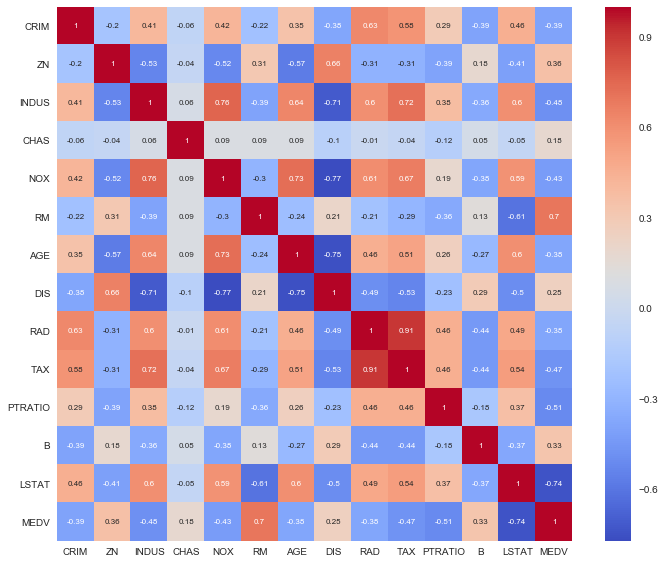

In [12]:
# visualise the correlation between all variables in the dataset using a heatmap
sns.heatmap(data.corr().round(2), cmap='coolwarm', annot=True, annot_kws={"size":8})
plt.tight_layout()
plt.show()

In [13]:
# from the heatmap, we can see that 
# the three variables with the strongest correlation to MEDV are the LSTAT(% lower status of the population) 
# ,RM (average number of rooms per dwelling) and PTRATIO
# We can also use the heatmap to check for correlation between variables so that we don’t include multicollinearity into a linear regression.
# For example both RAD and TAX are highly correlated (0.91) so they shouldn’t be used in a linear regression at the same time.

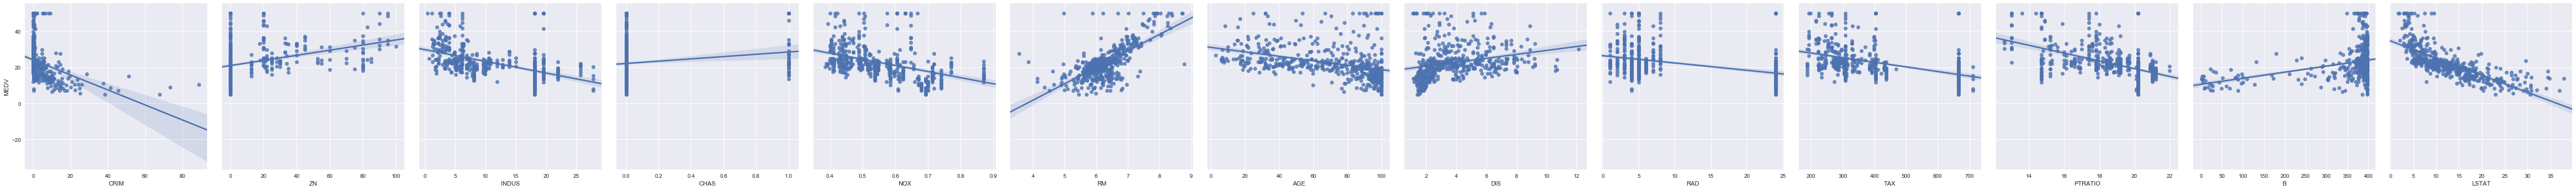

In [14]:
# view the relationship between each variable against the target variable "MEDV"
x_vars = ['CRIM','ZN','INDUS','CHAS','NOX','RM', 'AGE','DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']
y_vars = ['MEDV']
sns.pairplot(data=data, x_vars=x_vars, y_vars=y_vars, kind="reg", size=5)
# pp = pp.map_offdiag(plt.scatter, s=35, alpha=0.5)


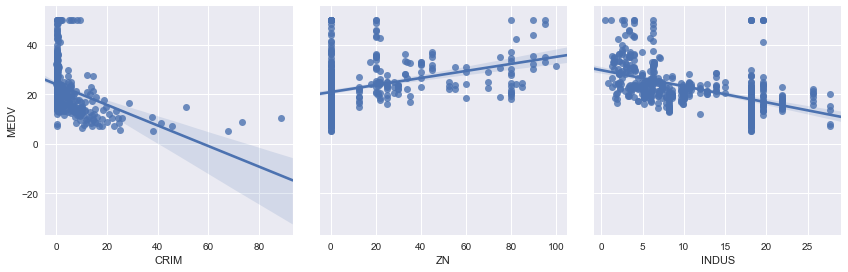

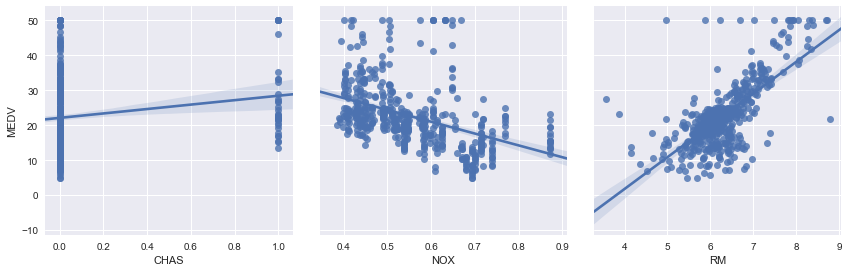

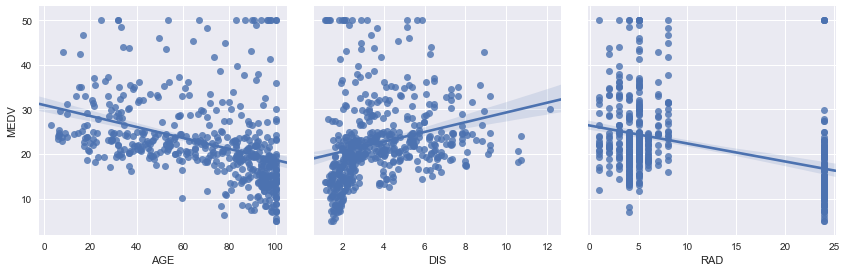

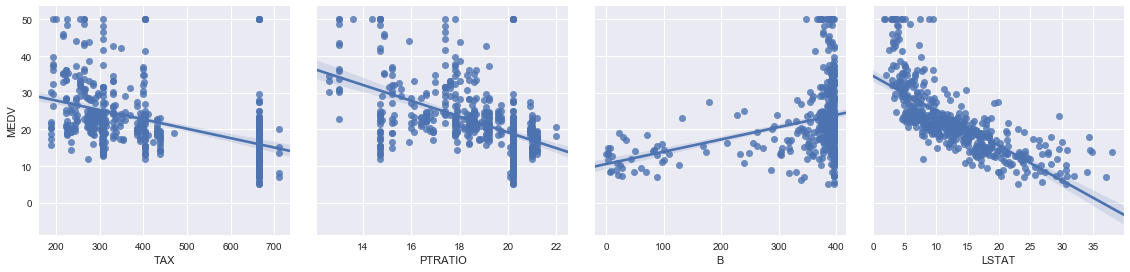

In [15]:
# tried many ways to increase figure size above but for now this is the only way i can do it
# view the relationship between each variable against the target variable "MEDV"
x_vars1 = ['CRIM','ZN','INDUS']
x_vars2 = ['CHAS','NOX','RM']          
x_vars3 = ['AGE','DIS', 'RAD']          
x_vars4 = ['TAX','PTRATIO', 'B', 'LSTAT']          
y_vars = ['MEDV']
sns.pairplot(data=data, x_vars=x_vars1, y_vars=y_vars, kind="reg", size=4)
sns.pairplot(data=data, x_vars=x_vars2, y_vars=y_vars, kind="reg", size=4)
sns.pairplot(data=data, x_vars=x_vars3, y_vars=y_vars, kind="reg", size=4)
sns.pairplot(data=data, x_vars=x_vars4, y_vars=y_vars, kind="reg", size=4)




In [ ]:
# the pairplots confirms our findings from the heatmap.
# i.e
# the three variables with the strongest correlation to MEDV are the LSTAT(% lower status of the population) 
# , RM (average number of rooms per dwelling) and PTRATIO
# we can also see that some other variables have a moderate correlation to MEDV 
# these are: INDUS, NOX, TAX